### continuous multivariate joint/marginal/conditional probability distributions

#### Vaig preguntar això el ChatGPT i em va dir que sí...
- La marginal es como hacer tener en cuanta solo esta variable?
- La condicional es tener en cuenta solo esta variable cuando otra variable vale X?
    - En el Notebook `nb44_BayesTheoreme.ipynb` diu que la versemblança i la condicional poden ser el mateix. 
- La conjunta es tener en cuenta cuando mas de 1 variable "juntas" cuando otra variable vale X?
- Però matitzant això: 
    - En resumen, la distribución marginal se centra en una variable sola, la distribución condicional se enfoca en una variable dada ciertos valores de otra, y la distribución conjunta considera la probabilidad de combinaciones específicas de valores para múltiples variables aleatorias.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme() # Setting seaborn style

##### Load the iris dataset (continuous variables)


In [2]:
iris = sns.load_dataset("iris")

### Joint  distributions

##### For two numerical variables the joint distribution is given by the 2D density function (estimated via multivariate KDE)
- this is analogous to a multivariate histogram of densities and we can visualize it using seaborn

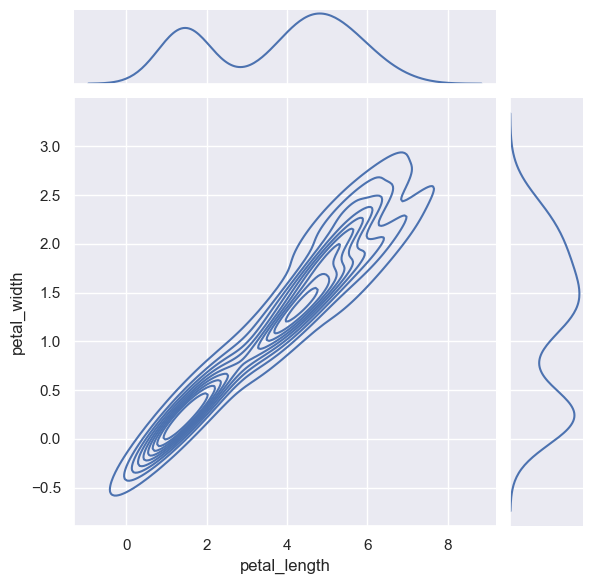

In [3]:
# e.g. the joint distribution of petal_length and petal_width in the Iris dataset
sns.jointplot(data = iris, x = 'petal_length', y = 'petal_width', kind = 'kde');

Als costats surt la distribucions marginals, la del mig es la conjunta, es una projecció o el perfil, pero no ven bé. No ho és perquè: 
- no és el punt més alt, es la suma de totes les que té a darrere
- Valor del petal_lenght (6) independentment de petal_width valor y. per tant és la suma de tots.
- Per tant no és el contorn com a tal. 
- Per això es diu distribució marginal, perquè es nomès de una variable. 
- Si vols fer una predicció, temperatura i velocitat del temps. No hi haurà la probabilitat on no hi ha linies. 
- Per deep racer, combinacions de girs i velocitats que són impossibles. Quan el cotxe ha de decidir, no les triarà mai, perqupe tindràn probabilitat 0.
- La ombra sería això, però no ho és del tot perque els valors es van sumant.
- La da més a fora està al mateix nivell a tots.
- Si n'hi hagues una apartada de tres. Voldría dir que aquella montanya arribaria nomès fins al nivell tres de les altres. 
- Arriba a més petit de 0 perque: 
    - Vol dir que tenim una petita probabilitat de tenir valors, perquè arriba nomès al segon pis. 
    - Sabem que no existeix &rarr; perque no hi poden haber fulles amb mida negativa. Està mal fet.
    - Vol dir que tenim massa band width al kernel. 
    - Es suma probabilitat en una area que no s'hauria de tenir. 
    - Fer un band with més petit. probabilitat en area impossible.

### Marginal  distributions

Histograma que correspondria a una variable individualment.

##### The marginal distributions are the density functions of each variable without considering the others.

- we can visualize them alongs with the joint distribuion in the side plots of the sns.jointplot() ... (???)
- we can also visualize them separately

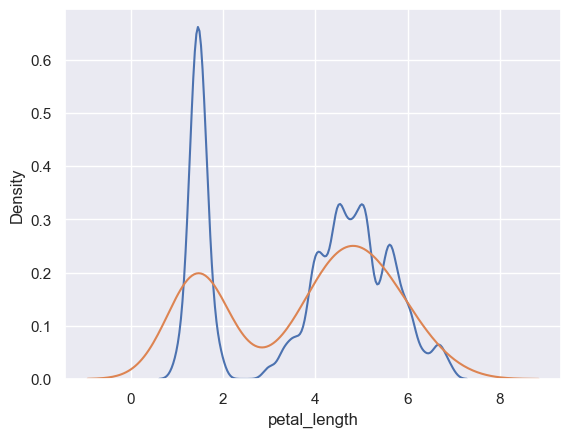

In [4]:
# e.g. the marginal distribution of the petal_length
sns.kdeplot(data = iris, x = 'petal_length', bw_adjust = 0.2)
# note that the difference with respect to the sns.jointplot() is the effect of the bandwidth used there
sns.kdeplot(data = iris, x = 'petal_length', bw_adjust = 1.0);

- Es veu el que comentavem de que es va fora del 0. 
- De si posem un kde malament.
- Efecte del band width.

### Conditional distributions

#### Conditional distributions describe the probabilities of one variable given specific values of another variable. 
- a particular case of conditional distributions is the class conditional distribution, describing the distribution of one variable for a given class

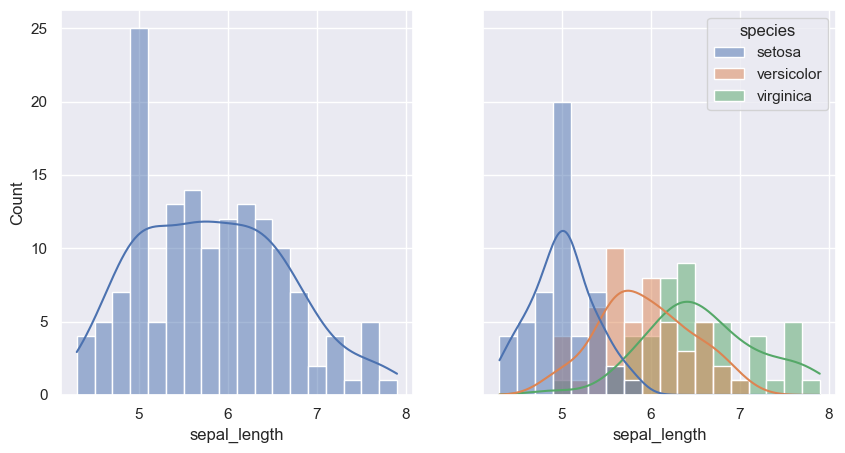

In [7]:
_, axs = plt.subplots(1,2, figsize= (10,5), sharey = True)
sns.histplot(ax = axs[0], data = iris, x = "sepal_length", binwidth = 0.2, kde = True);
# e.g. the class conditional distibution of the petal_length
sns.histplot(ax = axs[1], data = iris, x = "sepal_length", hue = 'species', binwidth = 0.2, kde = True);

Per una distribució condicional: 
- Taula de contingencia: 

Y columnes i X files

| | | |
|-|-|-|
|x1|x2|x3|
|a|b|c|
| | | |

- Fem a dividit per la suma, b dividit per la suma i c dividit per la suma. 
- La suma d'aquests numeros suma 1. 
- Si nomès tinguem observacions xi (per la fila), com es distribuiria la y

<hr/>

- Si tenim un conjunt de iris, si agafem nomès les que són virginica, si mirem com es distribueix. És una distribució diferent que si ho mirem tot. 
- El petal_lenght si es tracta de setosa, els valors que pren estàn entre 1 i 2. 
- Les virginicas i versicolors, el tenen més gran. 
- Les virginicas més que les versicolors, però se solapen. 
- petal_length al voltant de 5 que poden ser de les dues. 
- Si fessim l'histograma sense tenir amb compte la classe (plot de la esquerre).
- La conjunta és la de una sola variable (com es distribueix el sepal lenght). 
- El blau és qualsevol calsse
- Quan ho considerem condicional a la classe. ara ha baixat de si ho considerem. es perque ha passat a les taronjes que casi no es veuen.
- Fer comptes donada la classe.